<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21418C" size=24px>
                    <b>House Price Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
People looking to buy a new home tend to be more conservative with their budgets and market strategies. So, houuse price prediction or forecasting is an important topic of a real estate. As earlier, House prices were determined by calculating the acquiring and selling price in a locality. Therefore, the House Price prediction model is very essential in filling the information gap and improve Real Estate efficiency. With this model, we would be able to better predict the prices. 

The relationship between house prices and the economy is an important motivating factor for predicting house prices. A property’s value is important in real estate transactions. Housing price trends are not only the concern of buyers and sellers, but it also indicates the current economic situation. Therefore, it is important to predict housing prices without bias to help both the buyers and sellers make their decisions.

## Data Definition

**id:** A notation for a house 

**date:** Date house was sold

**price:** Price is prediction target

**bedrooms**: Number of bedrooms

**bathrooms:** Number of bathrooms

**sqft_living:** Square footage of the home

**sqft_lot:** Square footage of the lot

**floors:** Total floors in house

**waterfront:** House which has a view to a waterfront

**view:** Has been viewed

**condition:** How good the condition is (overall)

**grade:** Overall grade given to the housing unit, based on King country grading system

**sqft_above:** Square footage of the house apart from basement

**sqft_basement:** Square footage of the basement

**yr_built:** Built year 

**yr_renovated:** Year when house was renovated

**zipcode:** Zip

**lat:** ladtitude coordinates

**long:** longitude coordinates

**sqft_living15:** Living room area in 2015

**sqft_lot15:** Lot size area in 2015

<a id='import_lib'></a>
## 1. Import Libraries

In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

<a id='Read_Data'></a>
## 2. Read Data

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<a id='data_preparation'></a>
## 3. Data Analysis and Preparation


<a id='Data_Shape'></a>
### Checking dimensions of the dataframe in terms of rows and columns

In [4]:
# .shape returns the dimension of the data
df.shape

(21613, 21)

<a id='Data_Types'></a>
### Checking the Data Types 
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

In [5]:
# use .dtypes to view the data type of a variable
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**Change the incorrect data types**

In [6]:
# Converting the Bathrooms column to integer.
df['bathrooms']= df['bathrooms'].astype('int64')

#convert Date column from object to datetime
df['date']= df['date'].apply(pd.to_datetime) 

#extracting year and month from Date
df['year']= df['date'].dt.year   
df['month']= df['date'].dt.month
df['month']= df['month'].astype('object')

# Rounding off Floors and converting it into object
df['floors'] = round(df['floors'])
df['floors']= df['floors'].astype('int64')
df['floors'] = df['floors'].astype('object')

# Converting Waterfront, View, Condition and Grade it into object
df['waterfront'] = df['waterfront'].astype('object')
df['view'] = df['view'].astype('object')
df['condition'] = df['condition'].astype('object')
df['grade'] = df['grade'].astype('object')

# Dropping these columns as they are not needed.
df= df.drop(['id', 'date','zipcode'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


**Recheck the data types after the conversion**

In [7]:
# recheck the data types using .dtypes
df.dtypes

price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors            object
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int64
month             object
dtype: object

<a id='Summary_Statistics'></a>
### Summary Statistics

**1. For numerical variables, we use .describe()**

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,2014.322954
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,0.467616
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


**2. For categorical features, we use .describe(include=object)**

In [9]:
df.describe(include = object)

,floors,waterfront,view,condition,grade,month
count,21613,21613,21613,21613,21613,21613
unique,4,2,5,5,12,12
top,1,0,0,3,7,5
freq,10680,21450,19489,14031,8981,2414


<a id='Missing_Values'></a>
### Missing Values

In [10]:
# Finding if the dataset has any null values.
df.isnull().sum()
# We can see that the dataset does not have any null values.

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64

There are no missing values found in our datasets

<a id='correlation'></a>
### Correlation

<ul>
    <li>Correlation is the extent of linear relationship among numeric variables</li>
    <li>It indicates the extent to which two variables increase or decrease in parallel</li>
    <li>The value of a correlation coefficient ranges between -1 and 1</li>
    <li> Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated</li>
    </ul>
    

**1. Filter out only the numeric variables from the dataframe using select_dtypes() function**

In [11]:
df_numeric_features = df.select_dtypes(include=np.number)

# print the names of the numeric variables 
df_numeric_features.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'year'],
      dtype='object')

**2.  Call the corr() function which will return the correlation matrix of numeric variables**

In [12]:
# generate the correlation matrix
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
price,1.000000,0.308350,0.510072,0.702035,0.089661,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447,0.003576
bedrooms,0.308350,1.000000,0.467452,0.576671,0.031703,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244,-0.009838
bathrooms,0.510072,0.467452,1.000000,0.697875,0.085310,0.639933,0.250880,0.433647,0.060436,0.031351,0.179351,0.510049,0.080779,-0.021698
sqft_living,0.702035,0.576671,0.697875,1.000000,0.172826,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286,-0.029038
sqft_lot,0.089661,0.031703,0.085310,0.172826,1.000000,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557,0.005468
sqft_above,0.605567,0.477600,0.639933,0.876597,0.183512,1.000000,-0.051943,0.423898,0.023285,-0.000816,0.343803,0.731870,0.194050,-0.023823
sqft_basement,0.323816,0.303093,0.250880,0.435043,0.015286,-0.051943,1.000000,-0.133124,0.071323,0.110538,-0.144765,0.200355,0.017276,-0.015687
yr_built,0.054012,0.154178,0.433647,0.318049,0.053080,0.423898,-0.133124,1.000000,-0.224874,-0.148122,0.409356,0.326229,0.070958,0.003507
yr_renovated,0.126434,0.018841,0.060436,0.055363,0.007644,0.023285,0.071323,-0.224874,1.000000,0.029398,-0.068372,-0.002673,0.007854,-0.023707
lat,0.307003,-0.008931,0.031351,0.052529,-0.085683,-0.000816,0.110538,-0.148122,0.029398,1.000000,-0.135512,0.048858,-0.086419,-0.029212


In [13]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,True,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,True,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,True,False,False,False,False


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

[]

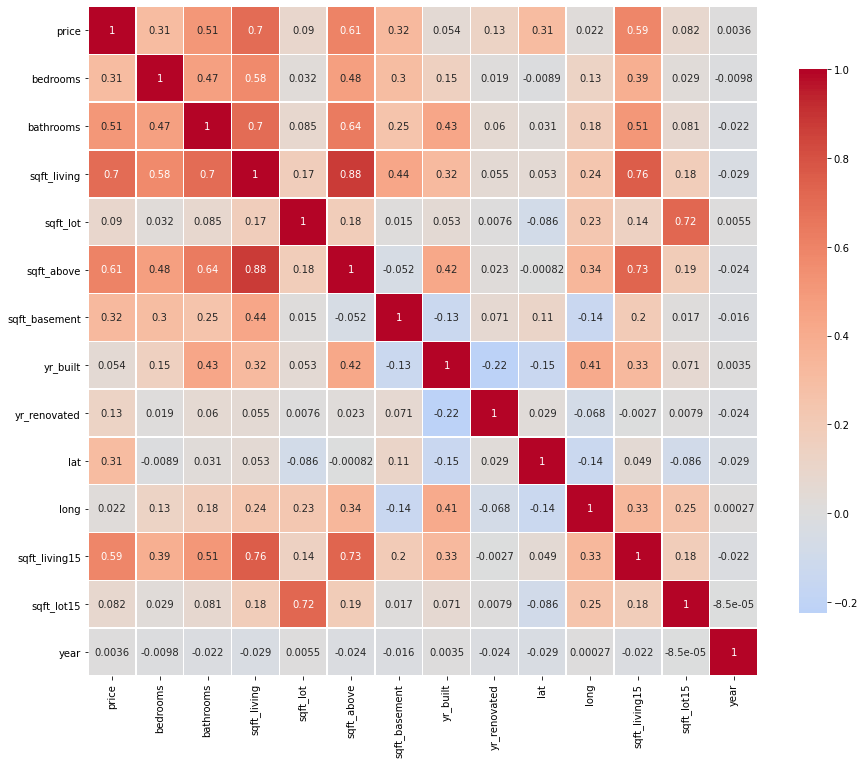

In [14]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),cmap='coolwarm', center=0, square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
plt.plot()

The darkest red outputs illustrate the strongest positive linear relationships as far as we can tell strictly from
correlation coefficients(r), and the darkest blue values are the negative linear relationships.

The values that describe each house's size & condition are often strongly correlated with each other.

The variables that are square footage-specific seem to show a very similar relationship with each other and price

### Analyze Numerical Variables

In [15]:
df_numeric_features = df.select_dtypes(include=np.number)

df_num = df_numeric_features.drop(['price', 'yr_built', 'yr_renovated', 'lat', 'long', 'year', 'bathrooms'], axis = 1)

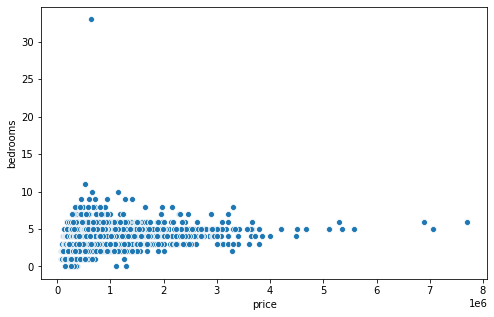

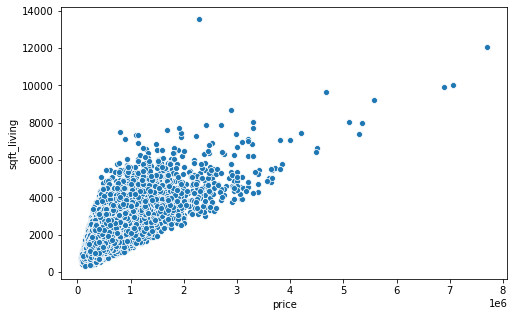

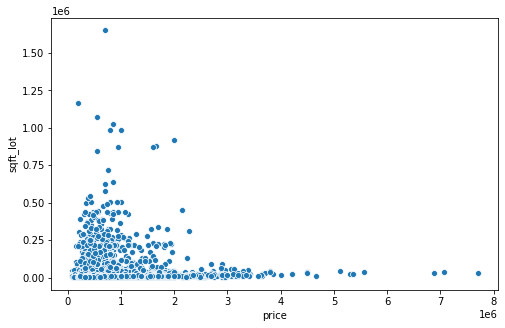

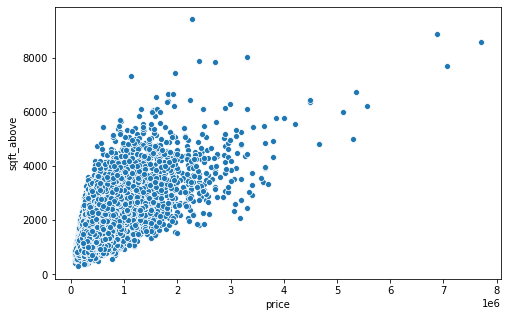

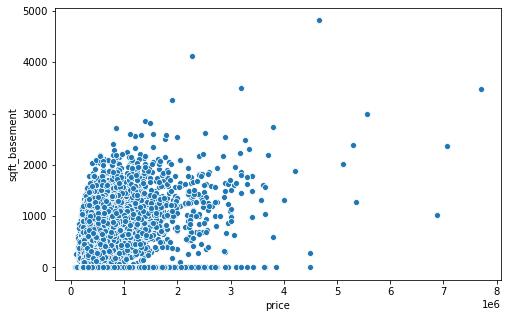

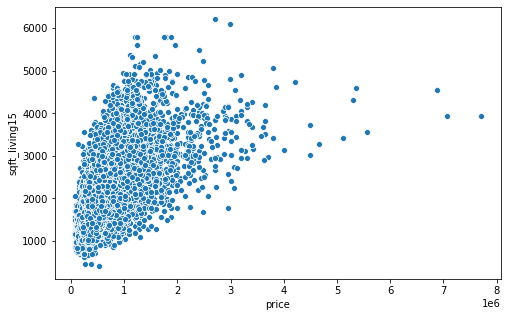

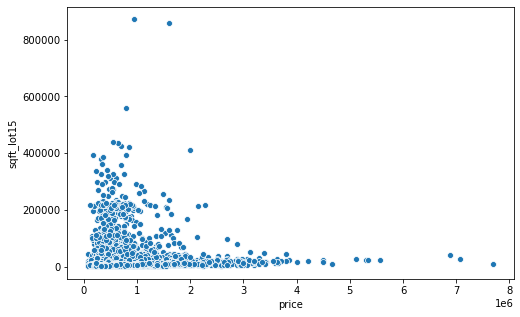

In [16]:
for col in df_num.columns:
    plt.figure(figsize = (8, 5))
    sns.scatterplot(df['price'], df_num[col])
    plt.show()

<a id='categorical'></a>
### 4.1.6 Analyze Categorical Variables

Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots.

In [17]:
#Categorical column

cat_cols = df.select_dtypes(include = 'object')
for col in cat_cols:
    print(col, ':', df[col].nunique())

floors : 4
waterfront : 2
view : 5
condition : 5
grade : 12
month : 12


In [18]:
cat_cols.columns

Index(['floors', 'waterfront', 'view', 'condition', 'grade', 'month'], dtype='object')

**Let us visualize the categorical variables**

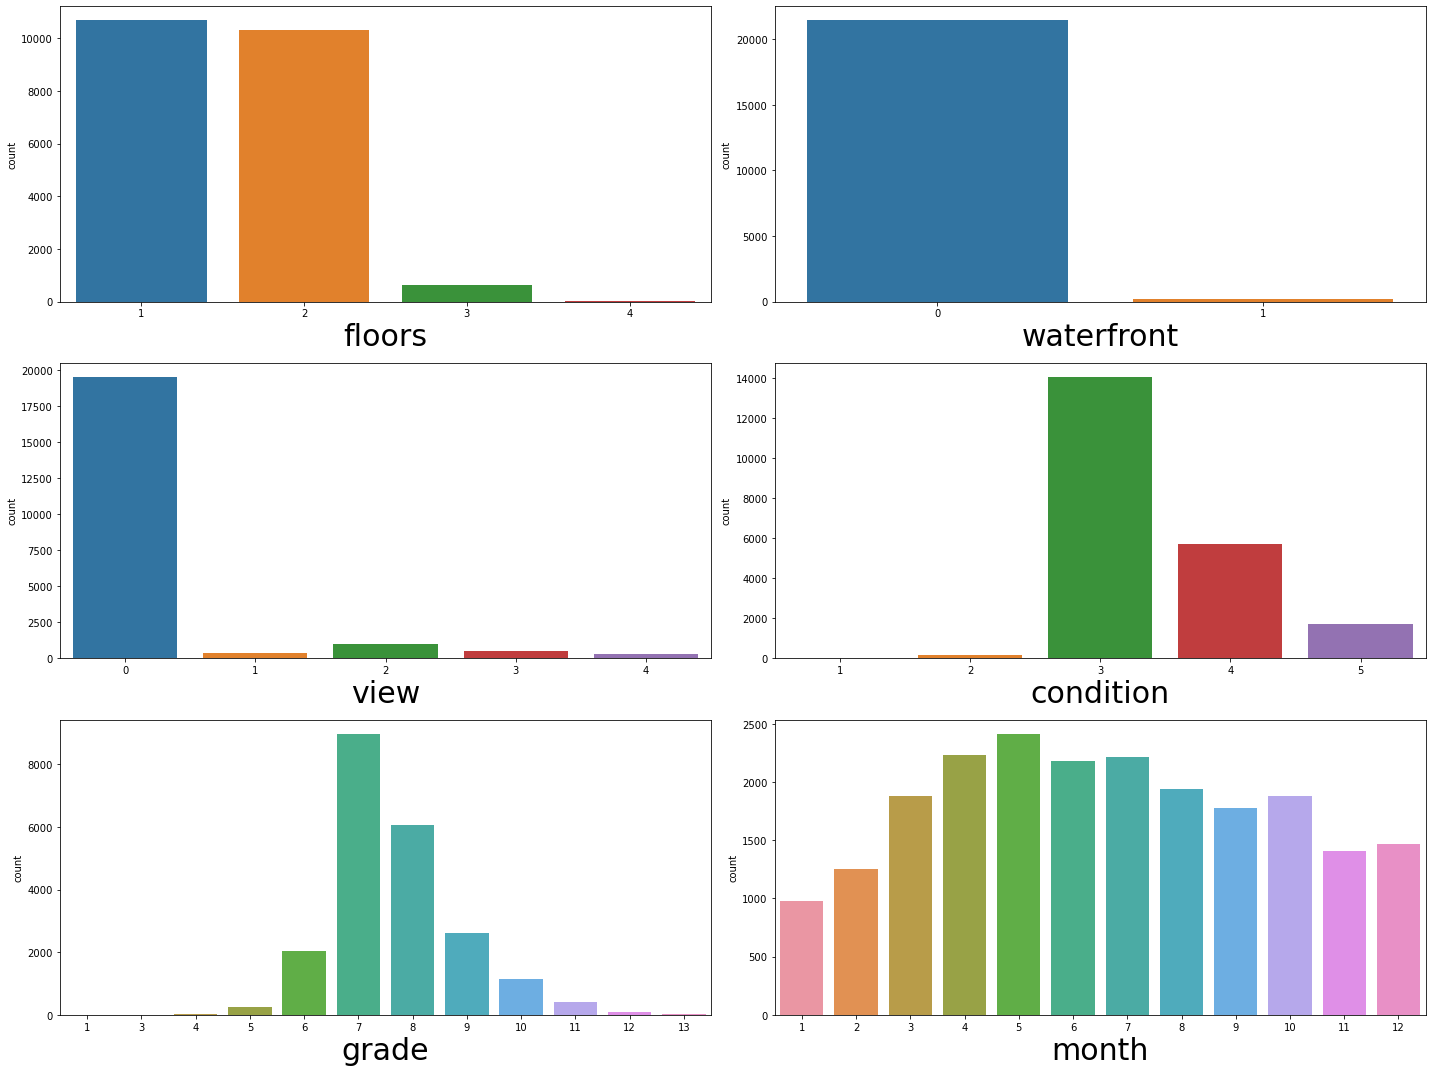

In [19]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

# plot a count plot for all the categorical variables
for variable, subplot in zip(cat_cols, ax.flatten()):
    
    countplot = sns.countplot(df[variable], ax=subplot )
    countplot.set_xlabel(variable, fontsize = 30)

plt.tight_layout()   
plt.show()

There are 6 categorical variables. From the output we see that the variable 'grade' and 'month' has most number of categories. There are 12 grades in the data, of which '7' occurs highest number of times.Whereas there are 12 months conisdered in the data, of which '5' occurs highest number of times.

<a id='categorical_numerical'></a>
### 4.1.7 Analyze Relationship Between Target and Categorical Variables
The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables.

In [20]:
df.describe(include=object)

,floors,waterfront,view,condition,grade,month
count,21613,21613,21613,21613,21613,21613
unique,4,2,5,5,12,12
top,1,0,0,3,7,5
freq,10680,21450,19489,14031,8981,2414


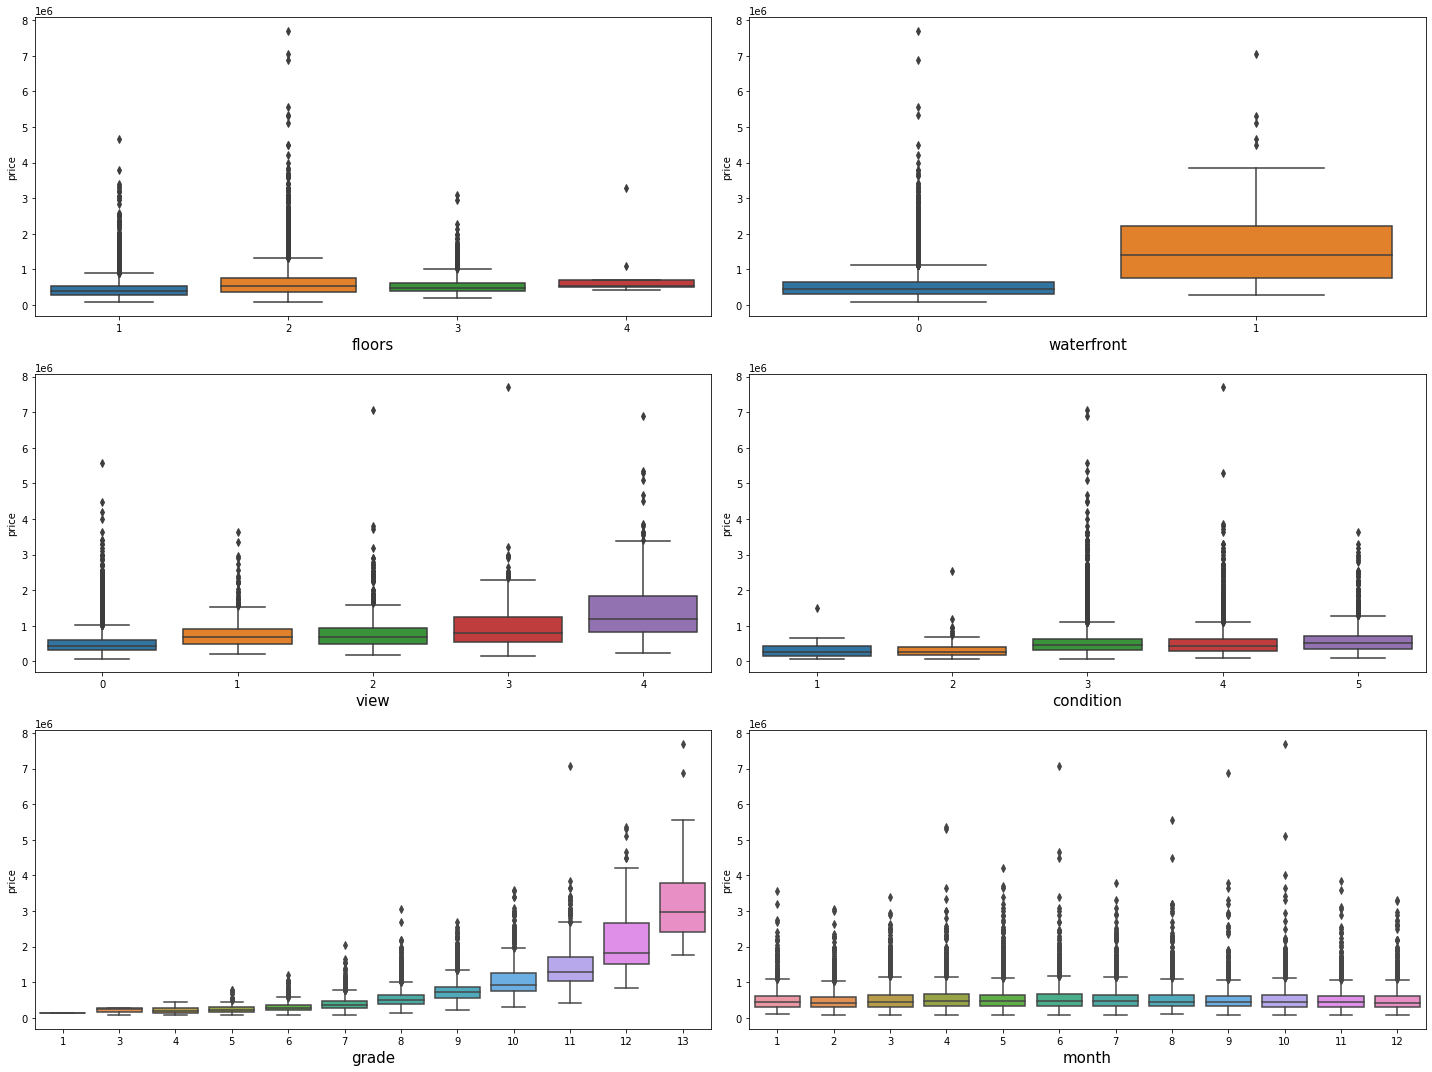

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(cat_cols, ax.flatten()):
    boxplt = sns.boxplot(x=variable, y='price', data=df, ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 15)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   
plt.show() 

Observation:
- If we see the graph between floors with the price, we see that the mean price are almost equal irrespective of the number of floors. However maximum number of houses which have higher prices, have two floors.
- The houses which have waterfront have high mean price as compare to the houses which don't have waterfront. But there are more houses that do not have a waterfront.
- In this graph between number of view and the price, we can see that more the number of view then pricr is high. We can also we that the houses that have views(1, 2) have the same mean.
- Condition(3, 4, 5) have almost same mean price, condition(1, 2) have almost same mean price. The houses which have condition(3, and 4 have higher price.

<a id='outliers'></a>
### Discover Outliers

An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

**1. Plot boxplot for numerical data**

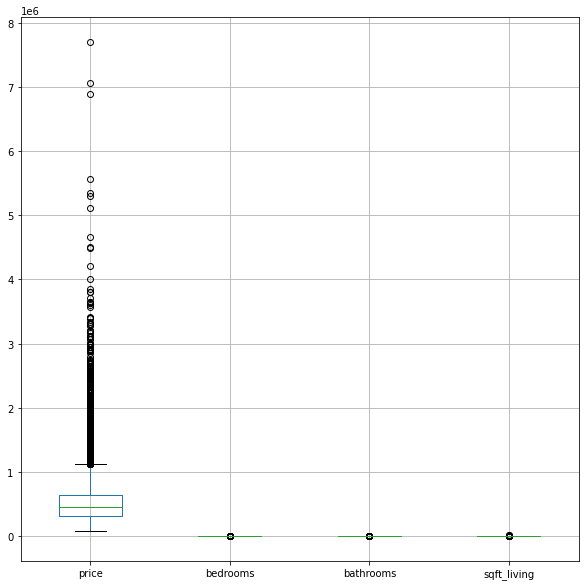

In [22]:
plt.rcParams['figure.figsize']=(10,10)


#num_cols.boxplot(column=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
#       'long', 'sqft_living15', 'sqft_lot15', 'year'])


df_numeric_features.boxplot(column=['price', 'bedrooms', 'bathrooms', 'sqft_living'])
plt.show()


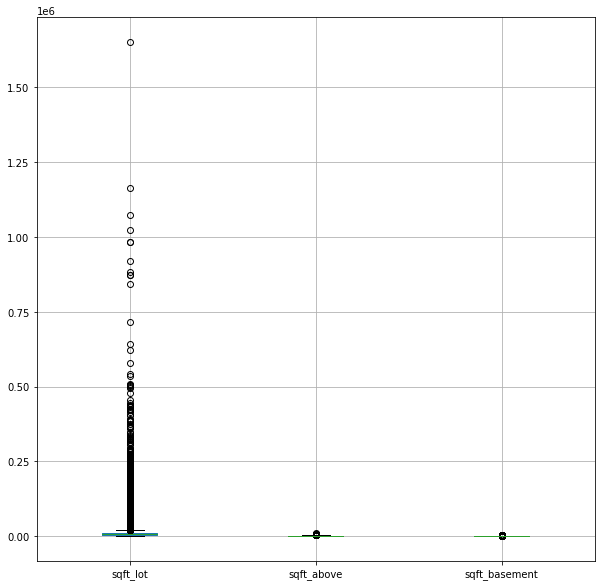

In [23]:
plt.rcParams['figure.figsize']=(10,10)
df_numeric_features.boxplot(column=['sqft_lot','sqft_above', 'sqft_basement'])
plt.show()

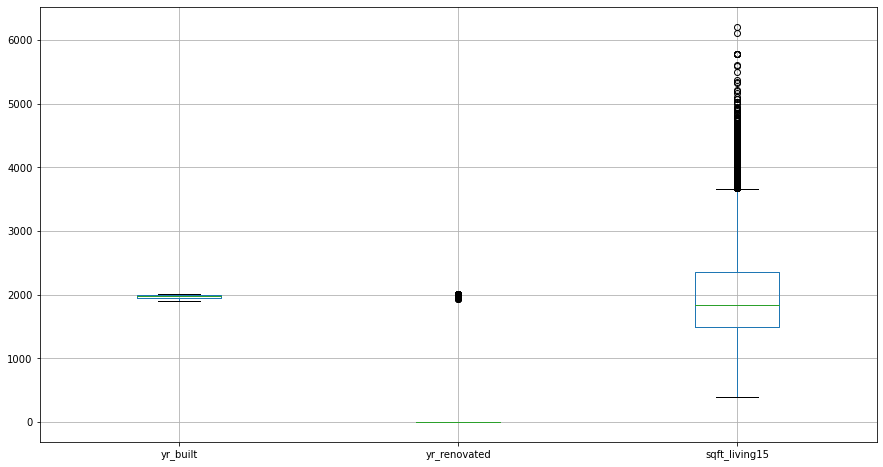

In [24]:
plt.rcParams['figure.figsize']=(15,8)
df_numeric_features.boxplot(column=['yr_built','yr_renovated','sqft_living15'])
plt.show()


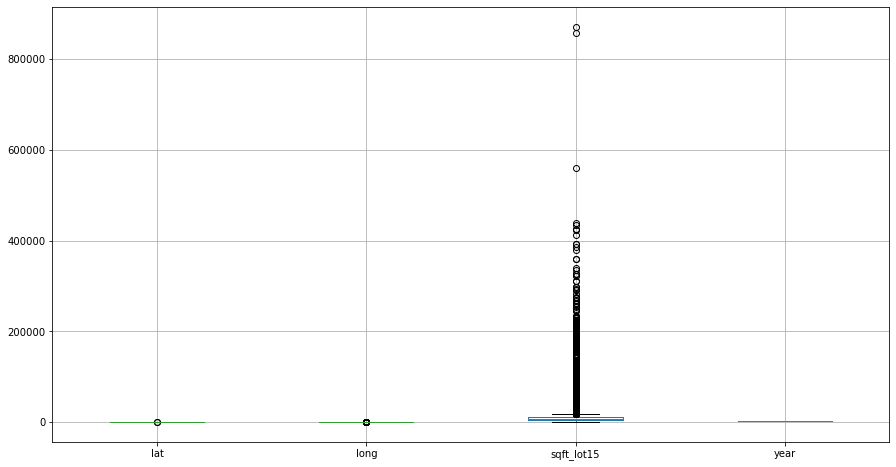

In [25]:
plt.rcParams['figure.figsize']=(15,8)
df_numeric_features.boxplot(column=['lat','long','sqft_lot15', 'year' ])
plt.show()

In [26]:
# calculate interquartile range 

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q1 =df_numeric_features.drop(['price'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q3 = df_numeric_features.drop(['price'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

bedrooms            1.000
bathrooms           1.000
sqft_living      1123.000
sqft_lot         5648.000
sqft_above       1020.000
sqft_basement     560.000
yr_built           46.000
yr_renovated        0.000
lat                 0.207
long                0.203
sqft_living15     870.000
sqft_lot15       4983.000
year                1.000
dtype: float64


In [27]:
df_price = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed

In [28]:
df_price.shape

(16832, 20)

**Plot boxplot to recheck for outliers**

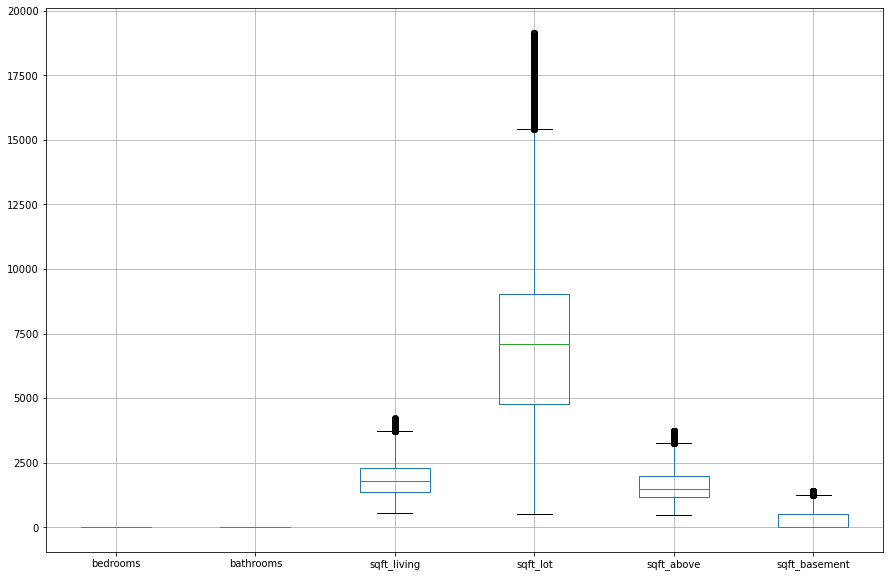

In [29]:
plt.rcParams['figure.figsize']=(15,10)
df_price.boxplot(column=[ 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','sqft_above', 'sqft_basement'])
plt.show()

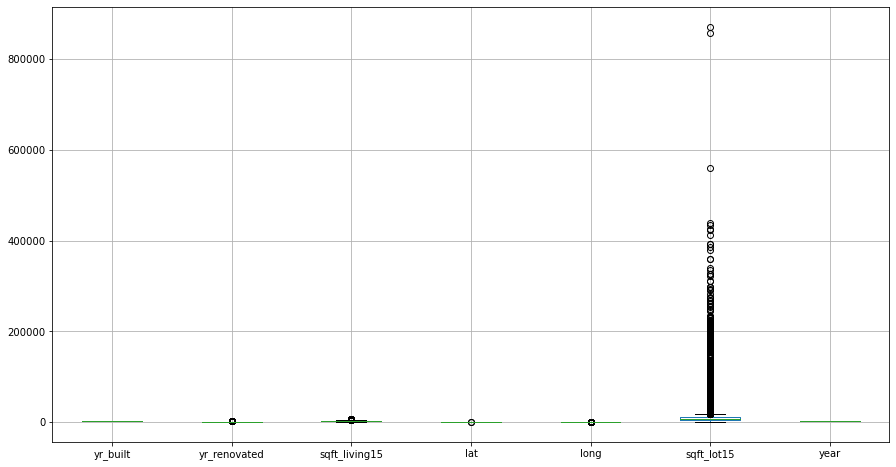

In [30]:
plt.rcParams['figure.figsize']=(15,8)
df_numeric_features.boxplot(column=['yr_built','yr_renovated','sqft_living15','lat','long','sqft_lot15', 'year' ])
plt.show()


Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

<a id='Recheck_Correlation'></a>
### Recheck the Correlation
Recheck the correlation after treating outliers. An outlier might either decrease or increase a correlation coefficient, depending on where it is in relation to the other points

**1. Filter out only the numeric variables from the dataframe**

In [31]:
# filter the numerical features in the dataset
# include=np.number: selects the numeric features
df_numeric_features = df_price.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'year'],
      dtype='object')

**2.  Call the corr() function which will return the correlation matrix of numeric variables**

In [32]:
# generate the correlation matrix 
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
price,1.000000,0.256849,0.357177,0.584479,-0.007072,0.476209,0.232643,0.008404,NaN,0.415824,0.007775,0.511084,-0.009188,0.014307
bedrooms,0.256849,1.000000,0.393820,0.606175,0.207872,0.490104,0.247894,0.170758,NaN,-0.065282,0.185100,0.410926,0.198118,-0.012134
bathrooms,0.357177,0.393820,1.000000,0.599041,-0.080474,0.544905,0.139041,0.509079,NaN,-0.018140,0.222591,0.440549,-0.082213,-0.023712
sqft_living,0.584479,0.606175,0.599041,1.000000,0.196196,0.844047,0.346808,0.347790,NaN,0.006857,0.275293,0.741775,0.185108,-0.027217
sqft_lot,-0.007072,0.207872,-0.080474,0.196196,1.000000,0.155200,0.086229,-0.077816,NaN,-0.139238,0.223451,0.248183,0.877430,0.006485
sqft_above,0.476209,0.490104,0.544905,0.844047,0.155200,1.000000,-0.210263,0.466618,NaN,-0.067721,0.400806,0.714050,0.144988,-0.019669
sqft_basement,0.232643,0.247894,0.139041,0.346808,0.086229,-0.210263,1.000000,-0.182078,NaN,0.130944,-0.199138,0.103418,0.083876,-0.015218
yr_built,0.008404,0.170758,0.509079,0.347790,-0.077816,0.466618,-0.182078,1.000000,NaN,-0.176554,0.433119,0.328506,-0.056451,-0.001495
yr_renovated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,0.415824,-0.065282,-0.018140,0.006857,-0.139238,-0.067721,0.130944,-0.176554,NaN,1.000000,-0.159118,-0.001122,-0.135181,-0.033190


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

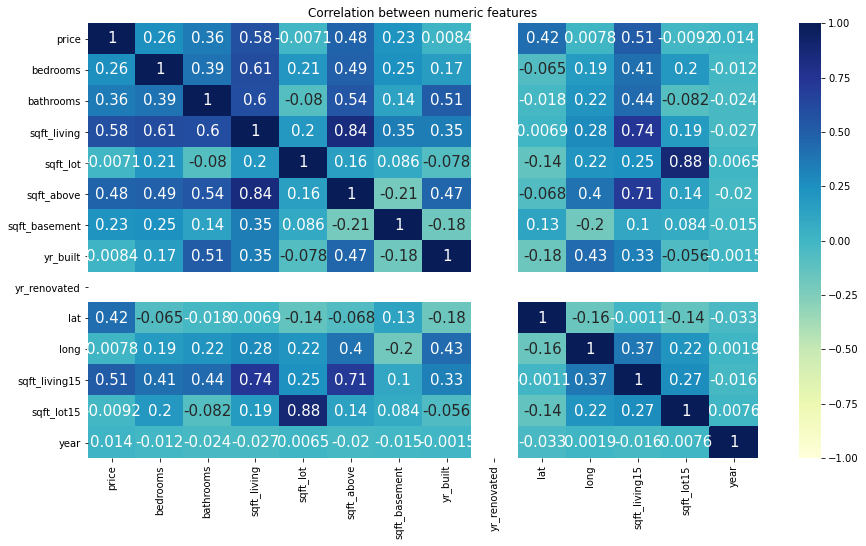

In [33]:
# set the figure size
plt.figure(figsize=(15, 8))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15})

# specify name of the plot
plt.title('Correlation between numeric features')

# display the plot
plt.show()

Observation-
Columns like sqft_living15, sqft_above, sqft_living, lat are having a very good correlation with the price.
We can see the columns like sqft_lot15, long,yr_built,sqft_lot,bathroom as they have no correlation with the price.

In [34]:
# We can drop yr_renovated
df_price = df_price.drop('yr_renovated', axis = 1)


<a id='Multicollinearity'></a>
### Multicollinearity

In [35]:
abs(df_price.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year
price,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,True,False
sqft_above,False,False,False,True,False,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,True,False,False,False,False
long,False,False,False,False,False,False,False,False,False,True,False,False,False


Text(0.5, 1.0, 'Feature Correlation')

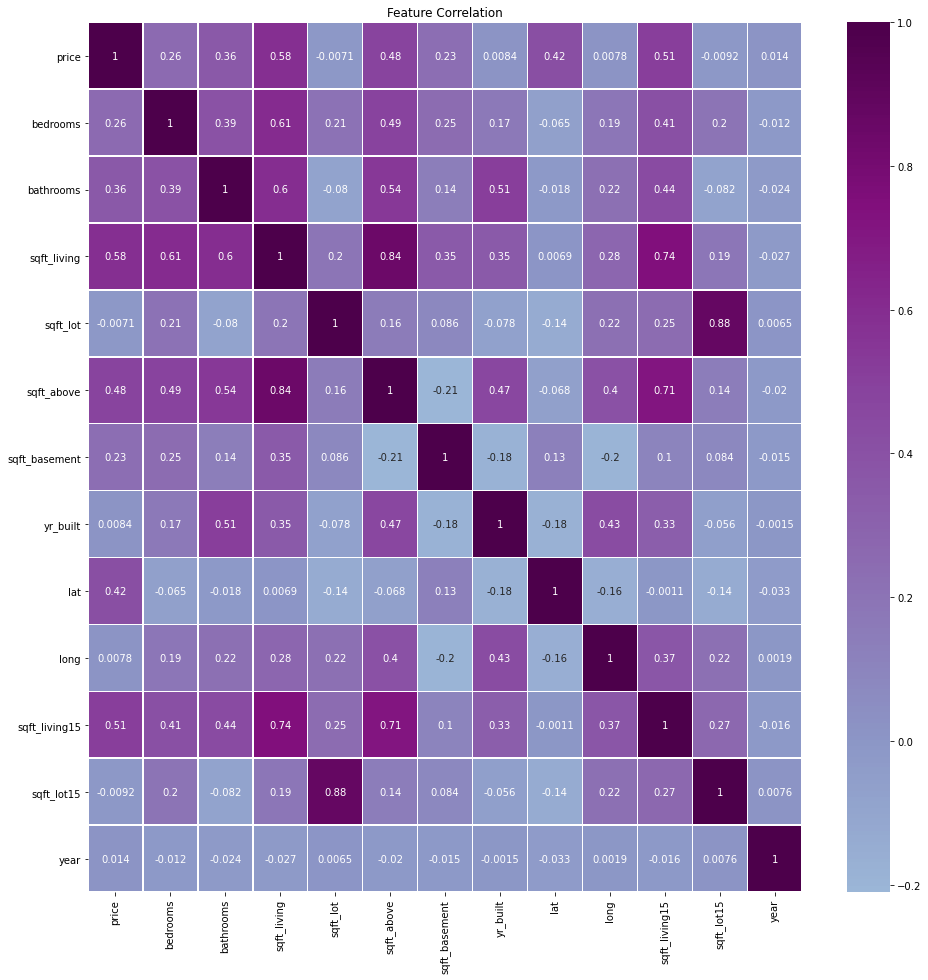

In [36]:
plt.figure(figsize=(16,16))
sns.heatmap(df_price.corr(), annot=True, center=0, linewidth=.5,cmap="BuPu")
plt.title('Feature Correlation')

- Here, we are looking for darker values, which translate to features that have higher correlation. Greater than 0.75 is a sign of multicollinearity. The highest correlation between features is 0.86, between sqft_above and sqft_living.
- This makes sense because sqft_living includes sqft_above. We can see that the pairs sqft_lot/sqft_lot15 and sqft_living/sqft_living15 have high correlation, which, again makes sense. We'll have to see if we want to remove one of each later on.

- Therefore removing sqft_above.



In [37]:
df_price.drop('sqft_above', axis=1, inplace=True) # dropping sqft_above

<a id='Data_Preparation'></a>
## 4 Prepare the Data

As per the assumptions of linear regression, residuals (actual values - predicted values) should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for target variable.

**1. Plot a histogram and also perform the Jarque-Bera test**

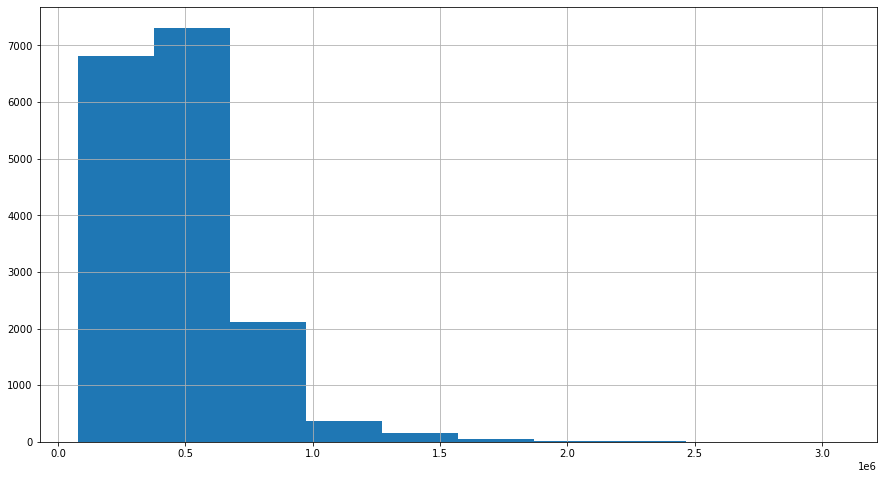

In [38]:
df_price['price'].hist()
plt.show()

From the above plot, we can notice that the variable 'claim' is heavily right skewed and not normally distributed

**We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights**

In [39]:
from scipy.stats import jarque_bera

In [40]:
stat, p = jarque_bera(df_price["price"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))


# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=48115.476, p-value=0.000
The data is not normally distributed (reject H0)


**2. If the data is not normally distributed, use log transformation to get near normally distributed data**

As mentioned above we opt for log transformation. The log transformation can be used to make highly skewed distributions less skewed. We use np.log() to log transform the 'claim' variable. We also store the transformed variable into our data frame with a new name, 'log_price'.

In [41]:
# log transformation for normality using np.log()
df_price['log_price'] = np.log(df_price['price'])

# display first 5 rows of the data
df_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,log_price
0,221900.0,3,1,1180,5650,1,0,0,3,7,0,1955,47.5112,-122.257,1340,5650,2014,10,12.309982
2,180000.0,2,1,770,10000,1,0,0,3,6,0,1933,47.7379,-122.233,2720,8062,2015,2,12.100712
3,604000.0,4,3,1960,5000,1,0,0,5,7,910,1965,47.5208,-122.393,1360,5000,2014,12,13.311329
4,510000.0,3,2,1680,8080,1,0,0,3,8,0,1987,47.6168,-122.045,1800,7503,2015,2,13.142166
6,257500.0,3,2,1715,6819,2,0,0,3,7,0,1995,47.3097,-122.327,2238,6819,2014,6,12.458775


**3. Recheck for normality by plotting histogram and performing Jarque-Bera test**

Let us first plot a histogram of `log_claim`

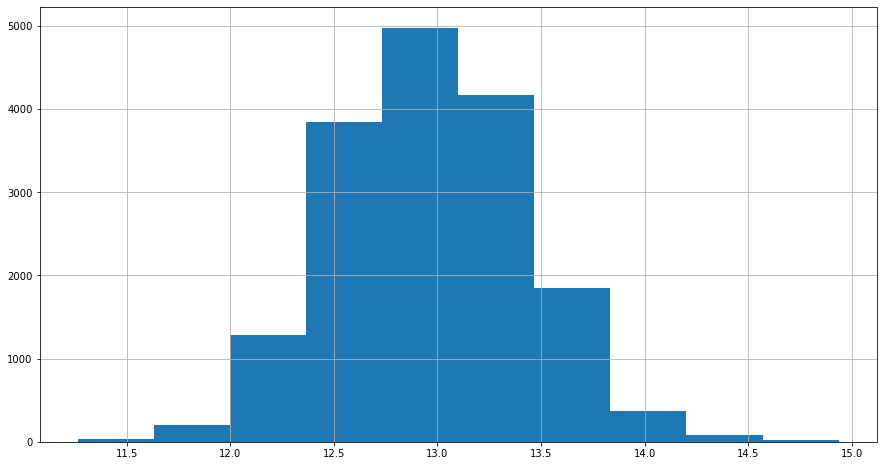

In [42]:
df_price.log_price.hist()
plt.show()

<table align="left">
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be seen that the variable claim is near normally distributed. However we again confirm by Jarque Bera test</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us perform Jarque Bera test

In [43]:
statn, pv = jarque_bera(df_price['log_price'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=48115.476, p-value=0.000
The data is not normally distributed (reject H0)


<table align="left">
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be visually seen that the data has near-normal distribution, but Jarque Bera test does not support the claim
<br>                    
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

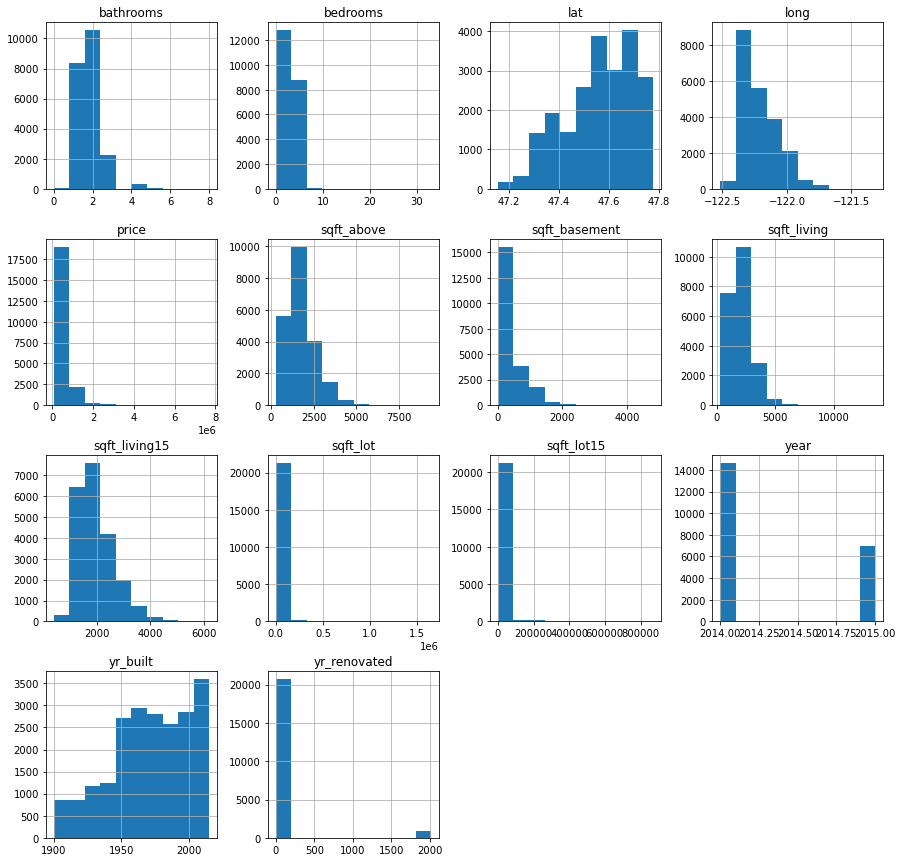

In [44]:
df.hist(figsize=[15,15])
plt.show()

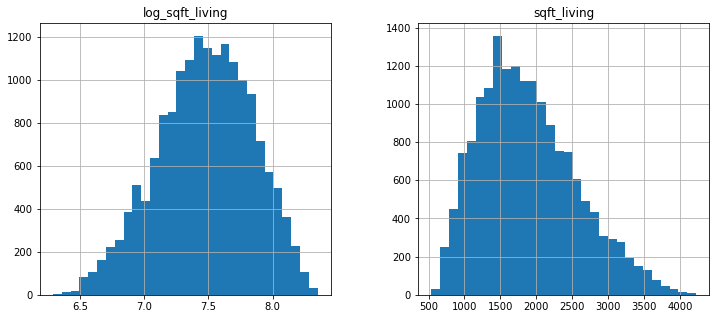

In [45]:
df_price['log_sqft_living'] = np.log(df_price['sqft_living'])


df_price[['sqft_living', 'log_sqft_living']].hist(figsize=(12,5),bins=30);

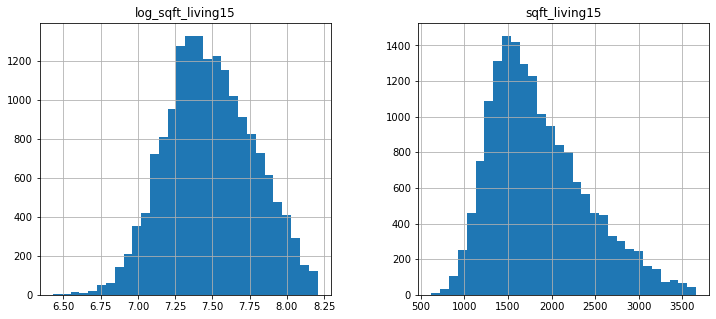

In [46]:
df_price['log_sqft_living15'] = np.log(df_price['sqft_living15'])


df_price[['sqft_living15', 'log_sqft_living15']].hist(figsize=(12,5),bins=30);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF2DA90>,
      dtype=object)

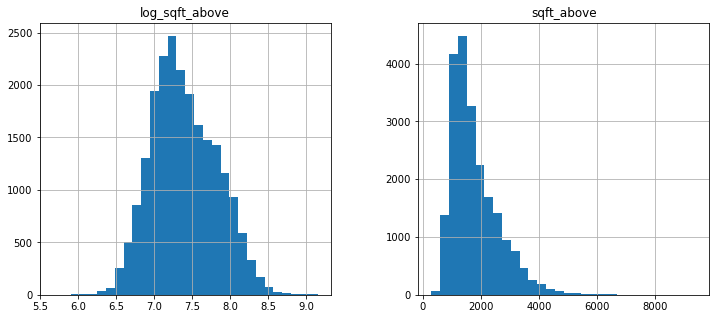

In [47]:
df['log_sqft_above'] = np.log(df['sqft_above'])

df[['sqft_above', 'log_sqft_above']].hist(figsize=(12,5),bins=30)

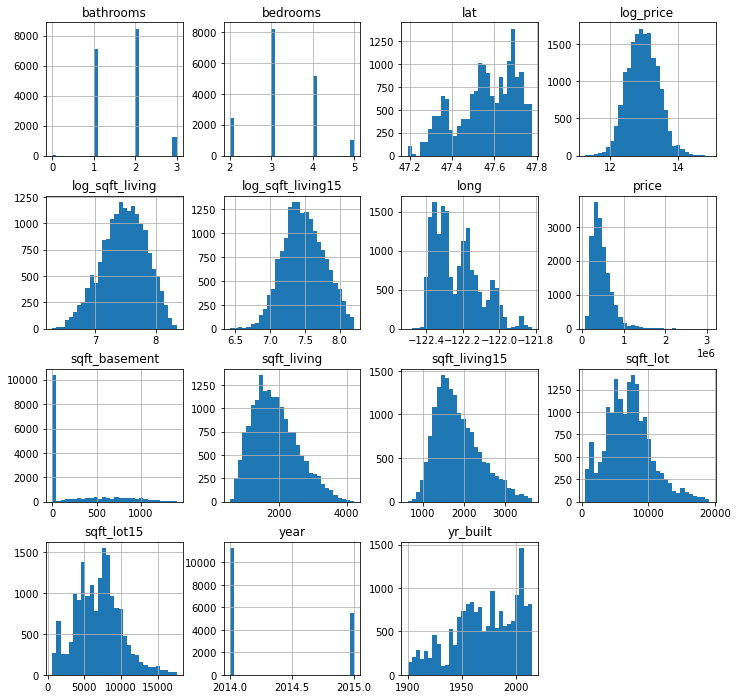

In [83]:
#Re-visualize all of our current models original & log transformed variables
df_price.hist(figsize=(12,12),bins=30)
plt.show()

In [49]:
df_price.head().T

,0,2,3,4,6
price,221900,180000,604000,510000,257500
bedrooms,3,2,4,3,3
bathrooms,1,1,3,2,2
sqft_living,1180,770,1960,1680,1715
sqft_lot,5650,10000,5000,8080,6819
floors,1,1,1,1,2
waterfront,0,0,0,0,0
view,0,0,0,0,0
condition,3,3,5,3,3
grade,7,6,7,8,7


<a id='dummy'></a>
### 4.2.3 Dummy Encoding of Categorical Variables

To build linear regression models we use OLS method. As seen before in section 4.1.2, it is seen that some variables are categorical. The OLS method fails to perform in presence of categorical variables. To overcome this we use dummy encoding.

**1. Filter numerical and categorical variables**

In [50]:
df_numeric_features = df_price.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year', 'log_price', 'log_sqft_living',
       'log_sqft_living15'],
      dtype='object')

In [51]:
df_categoric_features = df_price.select_dtypes(include=[np.object])

# display the categorical column features
df_categoric_features.columns

Index(['floors', 'waterfront', 'view', 'condition', 'grade', 'month'], dtype='object')

**2. Dummy encode the catergorical variables**

In [52]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:
    
    # for a feature create dummy variables using get_dummies()
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    
    # concatenate the categoric features with dummy variables using concat()
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    df_categoric_features.drop([col], axis=1, inplace=True)

**3. Concatenate numerical and dummy encoded categorical variables**

In [53]:
# concatenate the numerical and dummy encoded categorical variables using concat()
df_price_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_price_dummy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,yr_built,lat,long,sqft_living15,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.0,3,1,1180,5650,0,1955,47.5112,-122.257,1340,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1,770,10000,0,1933,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3,1960,5000,910,1965,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2,1680,8080,0,1987,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,3,2,1715,6819,0,1995,47.3097,-122.327,2238,...,0,0,0,1,0,0,0,0,0,0


In [54]:
df = df_price_dummy

<table align="left">
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Thus we have obtained the dummy coded variables. <br><br>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [55]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,yr_built,lat,long,sqft_living15,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.0,3,1,1180,5650,0,1955,47.5112,-122.257,1340,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1,770,10000,0,1933,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3,1960,5000,910,1965,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2,1680,8080,0,1987,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,3,2,1715,6819,0,1995,47.3097,-122.327,2238,...,0,0,0,1,0,0,0,0,0,0


<a id='LinearRegression'></a>
## 5. Linear Regression (OLS)

<a id='withLog'></a>
### 5.1 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

**1. Split the data into training and test sets**

In [56]:
# add the intercept column to the dataset
df = sm.add_constant(df)

X = df.drop(['log_price', 'price'], axis = 1)
y = df['log_price']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (12624, 45)
The shape of X_test is: (4208, 45)
The shape of y_train is: (12624,)
The shape of y_test is: (4208,)


**2. Build model using sm.OLS().fit()**

In [57]:
X_constant = sm.add_constant(X)
ols=sm.OLS(y,X_constant)
ols_mod=ols.fit() 
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1101.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        03:32:14   Log-Likelihood:                 600.35
No. Observations:               16832   AIC:                            -1111.
Df Residuals:                   16787   BIC:                            -762.8
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -228.8550     24.888     -9.196      0.000    -277.637    -180.073
bedrooms             -0.0195      0.003     -6.366      0.000      -0.026      -0.014
bathrooms             0.0369      0.004      8.701      0.000       0.029       0.045
sqft_living           0.0001   1.62e-05      8.305      0.000       0.000       0.000
sqft_lot          -5.446e-06   1.13e-06     -4.830      0.000   -7.66e-06   -3.24e-06
sqft_basement     -1.791e-05   7.11e-06     -2.519      0.012   -3.19e-05   -3.97e-06
yr_built             -0.0034   9.58e-05    -35.907      0.000      -0.004      -0.003
lat                   1.4112      0.014    100.474      0.000       1.384       1.439
long                  0.0797      0.018      4.311      0.000       0.043       0.116
sqft_living15     -3.655e-05   2.32e-05     -1.578      0.115    -8.2e-05    8.86e-06
sqft_lot15        -1.335e-05   1.27e-06    -10.508      0.000   -1.58e-05   -1.09e-05
year                  0.0927      0.012      7.557      0.000       0.069       0.117
log_sqft_living       0.1453      0.029      4.957      0.000       0.088       0.203
log_sqft_living15     0.2924      0.042      6.886      0.000       0.209       0.376
floors_2              0.0197      0.006      3.583      0.000       0.009       0.031
floors_3              0.0513      0.012      4.133      0.000       0.027       0.076
floors_4              0.0937      0.096      0.977      0.329      -0.094       0.282
waterfront_1          0.4661      0.048      9.635      0.000       0.371       0.561
view_1                0.1649      0.016     10.314      0.000       0.134       0.196
view_2                0.1170      0.010     11.576      0.000       0.097       0.137
view_3                0.1599      0.016     10.222      0.000       0.129       0.191
view_4                0.2912      0.028     10.369      0.000       0.236       0.346
condition_2           0.2060      0.061      3.367      0.001       0.086       0.326
condition_3           0.3027      0.057      5.278      0.000       0.190       0.415
condition_4           0.3810      0.057      6.643      0.000       0.269       0.493
condition_5           0.4332      0.058      7.520      0.000       0.320       0.546
grade_5               0.2380      0.080      2.960      0.003       0.080       0.396
grade_6               0.3927      0.079      4.999      0.000       0.239       0.547
grade_7               0.5616      0.079      7.138      0.000       0.407       0.716
grade_8               0.7258      0.079      9.198      0.000       0.571       0.880
grade_9               0.9208      0.079     11.628      0.000       0.766       1.076
grade_10              1.0677      0.080     13.374      0.000       0.911       1.224
grade_11              1.2334      0.086     14.356      0.000       1.065

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 74% of the variation in dependent variable price.The Durbin-Watson test statistics is 1.998 and indicates that there is no autocorrelation.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**3. Predict the values using test set**

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predicting X_Train

y_train_pred = lr.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


# Predicting X_Test

y_test_pred = lr.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [60]:
print('r2_train: ', r2_train, ' rmse_train: ', rmse_train)
print('r2_test: ', r2_test, ' rmse_test: ', rmse_test)

r2_train:  0.7441434551842119  rmse_train:  0.23279523413254982
r2_test:  0.73691460182145  rmse_test:  0.23626827681841264


<a id='withoutLog'></a>
## 5.3. Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

In this case, we do not consider any kind of transformation on the dependent variable, we use the 'claim' variable as it is.

**1. Build model using sm.OLS().fit()**

In [61]:
df = sm.add_constant(df)

X = df.drop(['price'], axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (12624, 46)
The shape of X_test is: (4208, 46)
The shape of y_train is: (12624,)
The shape of y_test is: (4208,)


In [62]:
X_constant = sm.add_constant(X)
ols=sm.OLS(y,X_constant)
ols_mod=ols.fit() 
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     4315.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        03:32:15   Log-Likelihood:            -2.1104e+05
No. Observations:               16832   AIC:                         4.222e+05
Df Residuals:                   16786   BIC:                         4.225e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.083e+07   7.21e+06      1.503      0.133   -3.29e+06     2.5e+07
bedrooms            600.3654    886.229      0.677      0.498   -1136.737    2337.468
bathrooms          6387.8500   1228.880      5.198      0.000    3979.115    8796.584
sqft_living         106.1930      4.690     22.644      0.000      97.001     115.385
sqft_lot              0.2647      0.326      0.812      0.417      -0.374       0.904
sqft_basement         0.1933      2.055      0.094      0.925      -3.834       4.221
yr_built           -227.4682     28.719     -7.920      0.000    -283.761    -171.176
lat               -1.522e+05   5134.061    -29.651      0.000   -1.62e+05   -1.42e+05
long              -5.033e+04   5344.510     -9.417      0.000   -6.08e+04   -3.99e+04
sqft_living15        17.9152      6.693      2.677      0.007       4.796      31.034
sqft_lot15            1.3881      0.368      3.771      0.000       0.667       2.110
year              -6697.6319   3551.202     -1.886      0.059   -1.37e+04     263.099
log_price          4.971e+05   2229.424    222.974      0.000    4.93e+05    5.01e+05
log_sqft_living   -1.921e+05   8472.409    -22.676      0.000   -2.09e+05   -1.76e+05
log_sqft_living15 -5.785e+04   1.23e+04     -4.711      0.000   -8.19e+04   -3.38e+04
floors_2          -2951.9399   1591.096     -1.855      0.064   -6070.655     166.775
floors_3           3586.8353   3587.156      1.000      0.317   -3444.368    1.06e+04
floors_4          -1.457e+04   2.77e+04     -0.526      0.599   -6.89e+04    3.97e+04
waterfront_1       9.673e+04    1.4e+04      6.904      0.000    6.93e+04    1.24e+05
view_1             -895.5646   4632.701     -0.193      0.847   -9976.147    8185.018
view_2             4834.4787   2930.015      1.650      0.099    -908.659    1.06e+04
view_3              4.11e+04   4532.835      9.068      0.000    3.22e+04       5e+04
view_4             1.035e+05   8137.742     12.721      0.000    8.76e+04    1.19e+05
condition_2       -1.932e+04   1.77e+04     -1.093      0.274    -5.4e+04    1.53e+04
condition_3       -5.143e+04   1.66e+04     -3.102      0.002   -8.39e+04   -1.89e+04
condition_4        -4.94e+04   1.66e+04     -2.977      0.003   -8.19e+04   -1.69e+04
condition_5       -4.354e+04   1.67e+04     -2.612      0.009   -7.62e+04   -1.09e+04
grade_5           -5.764e+04   2.32e+04     -2.481      0.013   -1.03e+05   -1.21e+04
grade_6           -9.575e+04   2.27e+04     -4.217      0.000    -1.4e+05   -5.12e+04
grade_7           -1.103e+05   2.28e+04     -4.845      0.000   -1.55e+05   -6.57e+04
grade_8           -1.139e+05   2.29e+04     -4.985      0.000   -1.59e+05   -6.91e+04
grade_9           -7.995e+04    2.3e+04     -3.481      0.001   -1.25e+05   -3.49e+04
grade_10          -1.796e+04   2.32e+04     -0.775      0.439   -6.34e+04

<table align="left">
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 92.0 of the variation in dependent variable price.The Durbin-Watson test statistics is 1.999 and indicates that the is no autocorrelation.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**3. Predict the values using test set**

In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predicting X_Train

y_train_pred = lr.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


# Predicting X_Test

y_test_pred = lr.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [65]:
print('r2_train: ', r2_train, ' rmse_train: ', rmse_train)
print('r2_test: ', r2_test, ' rmse_test: ', rmse_test)

r2_train:  0.9211033577116967  rmse_train:  67336.71229923982
r2_test:  0.9163051391700079  rmse_test:  68619.99662622692


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering wihtout log transformation of the variable 'price' is  than the other model. And, the RMSE value of the model without considering the log transformation is considerably high. So,  we continue with variable 'log_price' as it is, instead of opting for log transformation
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Finetuning'></a>
## 5.3. Fine Tune Linear Regression Model (OLS)

<a id='Assumptions'></a>
### 5.3.1 Check the Assumptions of the Linear Regression

Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.

<a id='RemovingInsignificantVariable'></a>
### 5.3.1.1 Check Multicollinearity

The null and alternate hypothesis of linear regression as follows: <br>
    
    H0: All beta coefficients are zero
    H1: At least one beta coefficient is not zero

From the summary output of our linear regression model in section 5.2, we notice some of the variables are insignificant.

Now, we go ahead and build our next model without insignificant variables.

Let's create a list of insignificant variables

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
vif['feature']=X_constant.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
0,1.916799e+08,const
29,4.750674e+02,grade_7
30,3.974069e+02,grade_8
24,2.324846e+02,condition_3
25,1.980395e+02,condition_4
31,1.853257e+02,grade_9
28,1.723784e+02,grade_6
26,7.757319e+01,condition_5
32,5.428374e+01,grade_10
9,5.057804e+01,sqft_living15


In [67]:
X = df.drop(['log_price', 'price', 'grade_7', 'condition_3', 'year', 'floors_4', 'sqft_basement', 'month_9', 'month_8',
            'month_7', 'month_11', 'month_10', 'month_12'], axis = 1)
y = df['log_price']

X_constant = sm.add_constant(X)
ols=sm.OLS(y,X_constant)
ols_mod=ols.fit() 
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1452.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        03:32:19   Log-Likelihood:                 526.93
No. Observations:               16832   AIC:                            -985.9
Df Residuals:                   16798   BIC:                            -723.0
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -40.2681      2.419    -16.643      0.000     -45.011     -35.526
bedrooms             -0.0197      0.003     -6.387      0.000      -0.026      -0.014
bathrooms             0.0358      0.004      8.475      0.000       0.028       0.044
sqft_living           0.0001   1.62e-05      7.621      0.000    9.14e-05       0.000
sqft_lot          -5.353e-06   1.13e-06     -4.747      0.000   -7.56e-06   -3.14e-06
yr_built             -0.0034   9.56e-05    -35.367      0.000      -0.004      -0.003
lat                   1.4086      0.014    100.513      0.000       1.381       1.436
long                  0.0865      0.018      4.755      0.000       0.051       0.122
sqft_living15     -2.999e-05   2.32e-05     -1.294      0.196   -7.54e-05    1.54e-05
sqft_lot15        -1.323e-05   1.27e-06    -10.380      0.000   -1.57e-05   -1.07e-05
log_sqft_living       0.1551      0.029      5.325      0.000       0.098       0.212
log_sqft_living15     0.2826      0.043      6.642      0.000       0.199       0.366
floors_2              0.0266      0.005      5.540      0.000       0.017       0.036
floors_3              0.0577      0.012      4.790      0.000       0.034       0.081
waterfront_1          0.4604      0.049      9.486      0.000       0.365       0.556
view_1                0.1582      0.016      9.883      0.000       0.127       0.190
view_2                0.1152      0.010     11.403      0.000       0.095       0.135
view_3                0.1580      0.016     10.089      0.000       0.127       0.189
view_4                0.2838      0.028     10.084      0.000       0.229       0.339
condition_2          -0.0949      0.022     -4.232      0.000      -0.139      -0.051
condition_4           0.0791      0.005     17.093      0.000       0.070       0.088
condition_5           0.1300      0.007     17.913      0.000       0.116       0.144
grade_5              -0.3300      0.020    -16.554      0.000      -0.369      -0.291
grade_6              -0.1662      0.007    -22.867      0.000      -0.180      -0.152
grade_8               0.1647      0.005     32.490      0.000       0.155       0.175
grade_9               0.3608      0.008     43.258      0.000       0.344       0.377
grade_10              0.5100      0.014     37.329      0.000       0.483       0.537
grade_11              0.6749      0.035     19.394      0.000       0.607       0.743
grade_12              0.9228      0.168      5.495      0.000       0.594       1.252
month_2               0.0244      0.008      3.152      0.002       0.009       0.040
month_3               0.0619      0.007      9.407      0.000       0.049       0.075
month_4               0.0807      0.006     13.195      0.000       0.069       0.093
month_5               0.0225      0.006      3.734      0.000       0.011

In [68]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
vif['feature']=X_constant.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
0,1.788012e+06,const
8,5.017839e+01,sqft_living15
11,4.721347e+01,log_sqft_living15
3,3.598863e+01,sqft_living
10,3.496094e+01,log_sqft_living
9,4.623827e+00,sqft_lot15
4,4.539227e+00,sqft_lot
5,2.443913e+00,yr_built
2,2.070606e+00,bathrooms
25,2.023505e+00,grade_9


In [69]:
# Droping the columns that are not significant.
df = df.drop(['grade_7', 'condition_3', 'year', 'floors_4', 'sqft_basement', 'month_9', 'month_8',
            'month_7', 'month_11', 'month_10', 'month_12'], axis= 1)

In [70]:
df.columns

Index(['const', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price',
       'log_sqft_living', 'log_sqft_living15', 'floors_2', 'floors_3',
       'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2',
       'condition_4', 'condition_5', 'grade_5', 'grade_6', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6'],
      dtype='object')

<a id='Assumptions'></a>
### 5.3.2 Check the Assumptions of the Linear Regression

Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.

<a id='Autocorrelation'></a>
### 5.3.2.1 Detecting Autocorrelation

Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. One of the assumptions of the linear regression is that there should not be autocorrelation.

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis.
Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

The null and alternate hypothesis of Durbin-Watson test is as follows: <br>
        
          H0: There is no autocorrelation in the residuals
          H1: There is autocorrelation in the residuals

**The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation**

**From the summary output in section 5.3.1, we see that the Durbin-Watson static is  1.993**

**Hence we can conclude that there is no autocorrelation**

<a id='Heteroskedasticity'></a>
### 5.3.2.2 Detecting Heteroskedasticity
Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:<BR>
    
    H0: The residuals are homoskedastic
    H1: The residuals are not homoskedastic

In [71]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(ols_mod.resid, ols_mod.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)           

[('f-value', 846.2081962309692), ('p-value', 1.8161769631359816e-156)]

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Linearity_of_Residuals'></a>
### 5.3.2.3 Linearity of Residuals

Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.<br><br>The independent variables must have a linear relationship with the dependent variable.

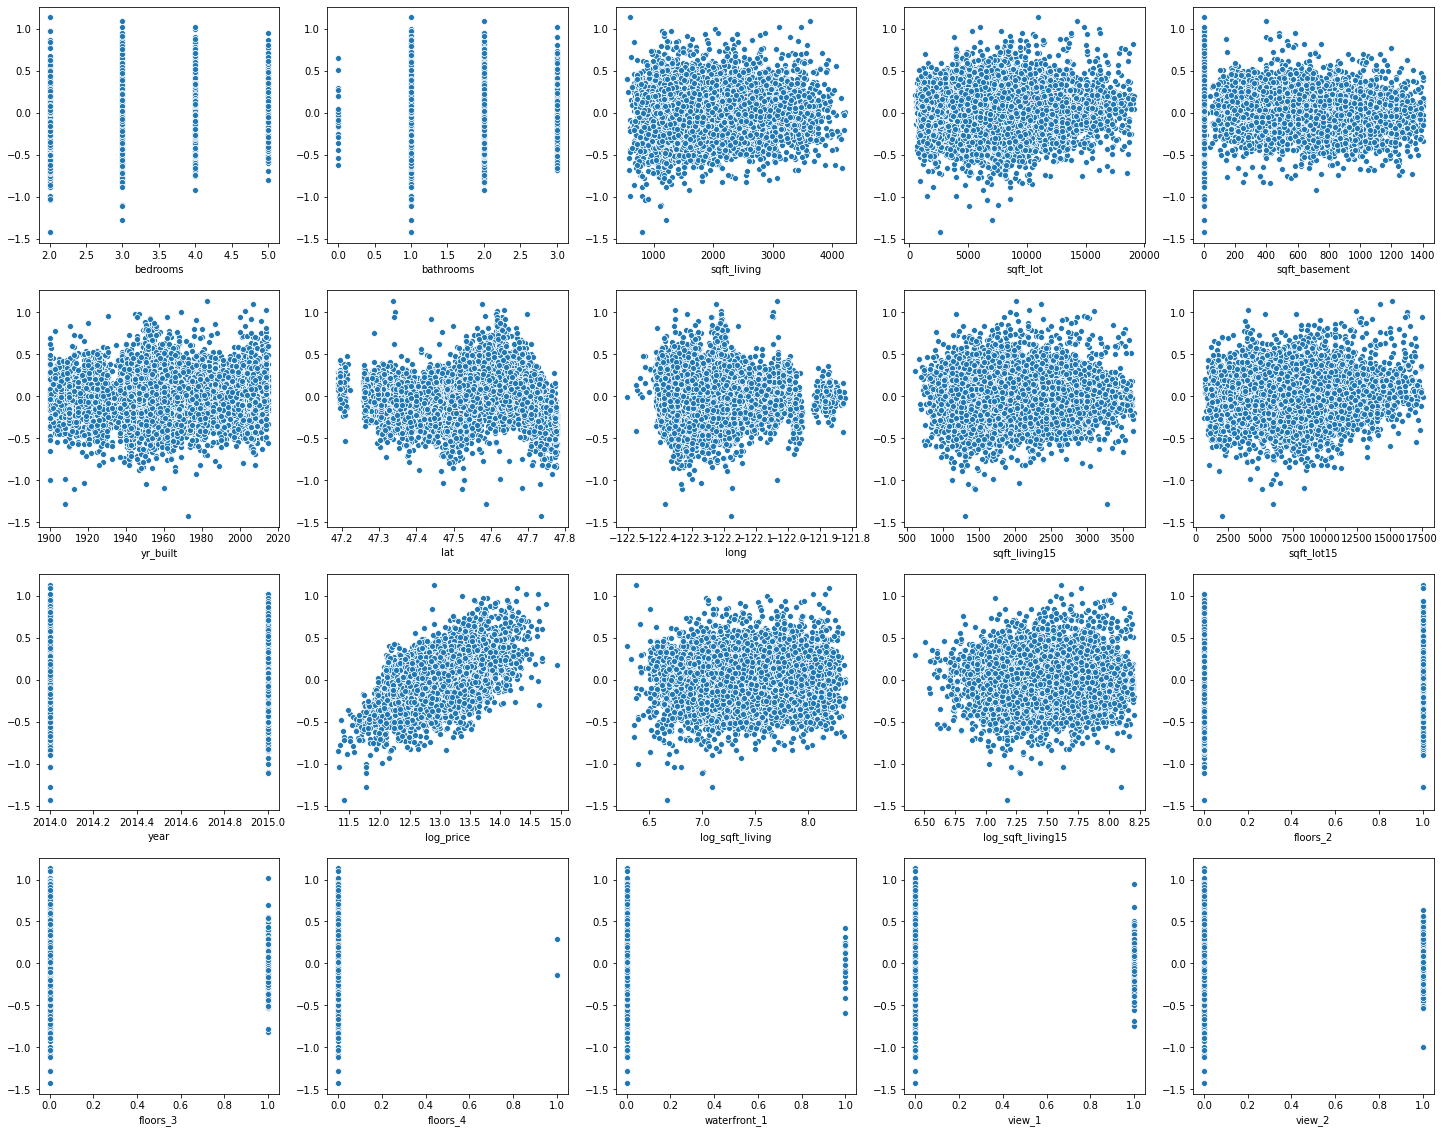

In [72]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 4, ncols= 5, figsize=(25, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train.columns[1:], ax.flatten()):
    sns.scatterplot(X_train[variable], ols_mod.resid , ax=subplot)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Normality_of_Residuals'></a>
### 5.3.2.4 Normality of Residuals

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

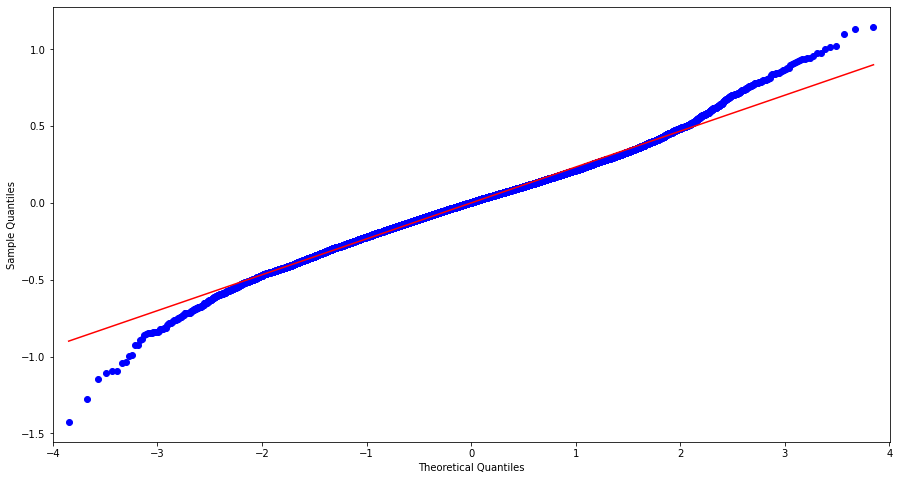

In [73]:
residuals = ols_mod.resid
from scipy.stats import norm
norm.fit(residuals)

sm.qqplot(residuals, line = 'r')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Using this plot, we can infer that the residuals do not come from a normal distribution. This is possible since our target variable is not normally distributed.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
# check the mean of the residual
ols_mod.resid.mean()

6.014050685422382e-13

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be concluded that the residuals is not normally distributed.<br><br>
                    </b> </font>
            </div>
        </td>
    </tr>
</table>


In [75]:
df.head()

,const,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long,sqft_living15,...,grade_8,grade_9,grade_10,grade_11,grade_12,month_2,month_3,month_4,month_5,month_6
0,1.0,221900.0,3,1,1180,5650,1955,47.5112,-122.257,1340,...,0,0,0,0,0,0,0,0,0,0
2,1.0,180000.0,2,1,770,10000,1933,47.7379,-122.233,2720,...,0,0,0,0,0,1,0,0,0,0
3,1.0,604000.0,4,3,1960,5000,1965,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,0
4,1.0,510000.0,3,2,1680,8080,1987,47.6168,-122.045,1800,...,1,0,0,0,0,1,0,0,0,0
6,1.0,257500.0,3,2,1715,6819,1995,47.3097,-122.327,2238,...,0,0,0,0,0,0,0,0,0,1


# 6. Feature Selection: RFE

In [76]:
from sklearn.feature_selection import RFE

In [77]:
X = df.drop(['log_price', 'price'], axis = 1)
y = df['log_price']

In [78]:
nof_list = np.arange(1,36)
high_score = 0

nof= 0
score_list = []

for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    
    model = LinearRegression()
    rfe = RFE(model, nof_list[n])
    
    x_train_rfe = rfe.fit_transform(x_train, y_train)
    x_test_rfe = rfe.transform(x_test)
    
    model.fit(x_train_rfe, y_train)
    score = model.score(x_test_rfe, y_test)
    score_list.append(score)
    
    if score > high_score:
        high_score = score
        nof = nof_list[n]
        
print("Omtimum no. of features: ", nof)
print("Score with", nof, "features: ", high_score)

Omtimum no. of features:  34
Score with 34 features:  0.7486688537568336


In [79]:
cols = list(X.columns)
model = LinearRegression()

rfe = RFE(model, 31)

x_rfe = rfe.fit_transform(X, y)

model.fit(x_rfe, y)
temp = pd.Series(rfe.support_, index = cols)
selected_features = temp[temp == True].index
print(selected_features)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'yr_built', 'lat', 'long',
       'sqft_living15', 'log_sqft_living', 'log_sqft_living15', 'floors_2',
       'floors_3', 'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4',
       'condition_2', 'condition_4', 'condition_5', 'grade_5', 'grade_6',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6'],
      dtype='object')


In [80]:
# Splitting the data
X = df[selected_features]
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [81]:
X_constant = sm.add_constant(X)
ols=sm.OLS(y,X_constant)
ols_mod=ols.fit() 
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1472.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        03:32:36   Log-Likelihood:                 222.35
No. Observations:               16832   AIC:                            -380.7
Df Residuals:                   16800   BIC:                            -133.3
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -50.7684      2.420    -20.975      0.000     -55.513     -46.024
bedrooms             -0.0291      0.003     -9.348      0.000      -0.035      -0.023
bathrooms             0.0481      0.004     11.242      0.000       0.040       0.056
sqft_living           0.0001   1.64e-05      7.565      0.000    9.22e-05       0.000
yr_built             -0.0034   9.71e-05    -34.664      0.000      -0.004      -0.003
lat                   1.4461      0.014    101.993      0.000       1.418       1.474
long                  0.0131      0.018      0.720      0.472      -0.023       0.049
sqft_living15     -3.524e-05   2.36e-05     -1.494      0.135   -8.15e-05     1.1e-05
log_sqft_living       0.1319      0.030      4.449      0.000       0.074       0.190
log_sqft_living15     0.2511      0.043      5.799      0.000       0.166       0.336
floors_2              0.0731      0.004     16.261      0.000       0.064       0.082
floors_3              0.1393      0.012     11.809      0.000       0.116       0.162
waterfront_1          0.3996      0.049      8.097      0.000       0.303       0.496
view_1                0.1477      0.016      9.064      0.000       0.116       0.180
view_2                0.1187      0.010     11.542      0.000       0.099       0.139
view_3                0.1596      0.016     10.014      0.000       0.128       0.191
view_4                0.2799      0.029      9.768      0.000       0.224       0.336
condition_2          -0.1050      0.023     -4.601      0.000      -0.150      -0.060
condition_4           0.0661      0.005     14.125      0.000       0.057       0.075
condition_5           0.1282      0.007     17.362      0.000       0.114       0.143
grade_5              -0.3425      0.020    -16.886      0.000      -0.382      -0.303
grade_6              -0.1745      0.007    -23.595      0.000      -0.189      -0.160
grade_8               0.1660      0.005     32.152      0.000       0.156       0.176
grade_9               0.3539      0.008     41.695      0.000       0.337       0.371
grade_10              0.4788      0.014     34.567      0.000       0.452       0.506
grade_11              0.6349      0.035     17.939      0.000       0.566       0.704
grade_12              0.8963      0.171      5.242      0.000       0.561       1.231
month_2               0.0219      0.008      2.778      0.005       0.006       0.037
month_3               0.0626      0.007      9.353      0.000       0.049       0.076
month_4               0.0812      0.006     13.049      0.000       0.069       0.093
month_5               0.0251      0.006      4.087      0.000       0.013       0.037
month_6               0.0139      0.006      2.181      0.029       0.001       0.026
=========================================================================

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 73.1% of the variation in dependent variable claim.The Durbin-Watson test statistics is  1.987 and indicates that there is no autocorrelation.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**2. Predict the values using test set**

In [82]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting X_Train

y_train_pred = lr.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


# Predicting X_Test

y_test_pred = lr.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_train: ', r2_train, ' rmse_train: ', rmse_train)
print('r2_test: ', r2_test, ' rmse_test: ', rmse_test)

r2_train:  0.7272753739158551  rmse_train:  0.23892541608699838
r2_test:  0.7377849918562653  rmse_test:  0.23902534844925677


<a id='rmse_and_r-squared'></a>
## 7. Conclusion and Interpretation

To take the final conclusion, let us recall the result table again

<table align="center" style="width:100%">
  <tr>
    <th>Model_Name</th>
    <th>R-Squared</th>
    <th>Adj. R-Squared</th>
      <th>RMSE</th>
  </tr>
  <tr>
    <td>Linreg full model with log of target variable</td>
    <td>0.743</td>
    <td>0.742</td>
     <td>0.23626 </td>
  </tr>
          <tr>
            <td>Linreg full model without log of target variable</td>
            <td>0.920</td>
            <td>0.920</td>
              <td>67336.71</td>
          </tr>
             <tr>
            <td>Linreg full model with significant variables</td>
            <td>0.731</td>
            <td>0.730</td>
                 <td>0.23892</td>
          </tr>
         
</table>

<table align="left">
    <tr>
        <td>
            <div align="left",style="font-size:200%">
                <font color="#21618C"><b>
                    <br> Findings suggest that the linear regression with log of target variable has the highest accuracy with lowest RMSE. Finally, it can be concluded that the linear regression with log can be used by real estate to predict price amount of house to the buyers and sellers.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>
